### DFS with and without goal test

In [1]:
def get_graph_input() -> dict[str, list[str]]:
  n = int(input("Enter number of vertices: "))
  graph = {}
  for i in range(n):
    d = input("Enter node value and connected vertices: ")
    v, *c = d.split()
    graph[v] = c
  return graph

In [2]:
graph = get_graph_input()
graph

Enter number of vertices: 6
Enter node value and connected vertices: a b c
Enter node value and connected vertices: b d e
Enter node value and connected vertices: c f
Enter node value and connected vertices: d
Enter node value and connected vertices: e f
Enter node value and connected vertices: f


{'a': ['b', 'c'], 'b': ['d', 'e'], 'c': ['f'], 'd': [], 'e': ['f'], 'f': []}

In [38]:
from collections import deque
from typing import Callable

def delete_node(graph: dict[str, list[str]], n: str):
  for node in graph:
    if n in graph[node]:
      graph[node].remove(n)
  del graph[n]

def dfs_with_goal_test(
    graph: dict[str, list[str]],
    start_node: str,
    goal_test: Callable[[str], bool]
) -> tuple[list[str], list[str]] | None:
  stack = deque(start_node)
  visited = []
  traversal_order = []
  backtracking = False

  while stack:
    top = stack[-1]
    if backtracking:
      if graph.get(visited[-1]):
        backtracking = False
      else:
        visited.pop()
    else:
      traversal_order.append(top)
      visited.append(top)
      stack.pop()
      if goal_test(top):
        return traversal_order, visited
      elif graph.get(top):
        for child in graph[top][::-1]:
          stack.append(child)
      else:
        backtracking = True
        visited.pop()
        delete_node(graph, top)

  return traversal_order, visited

def dfs_without_goal(graph: dict[str, list[str]]) -> list[str]:
  last_node = list(graph.keys())[-1]
  order, _ = dfs_with_goal_test(graph, next(iter(graph)), lambda x: False)
  return order

In [39]:
from copy import deepcopy

In [40]:
dfs_without_goal(deepcopy(graph))

['a', 'b', 'd', 'e', 'f', 'c']

In [41]:
traversal_order, path = dfs_with_goal_test(deepcopy(graph), 'a', lambda x: x == 'f')
print(
    f"Traversal order: {traversal_order}\n"
    f"Path: {path}"
)

Traversal order: ['a', 'b', 'd', 'e', 'f']
Path: ['a', 'b', 'e', 'f']


### Uniform cost search

In [56]:
import heapq
from typing import Callable, NamedTuple

class Edge(NamedTuple):
  cost: int
  node: str | None


def find_path(end_node: str, visited: dict[str, Edge]) -> list[str]:
  path = []
  node = end_node
  while node is not None:
    path.append(node)
    node = visited[node].node
  return path[::-1]


def ucs(
    graph: dict[str, list[Edge]],
    start_node: str,
    goal_test: Callable[[str], bool]
):
  min_priority_q = [Edge(0, start_node)]
  visited = {start_node: Edge(0, None)}
  while min_priority_q:
    cost, node = heapq.heappop(min_priority_q)
    if goal_test(node):
      return cost, find_path(node, visited)

    for n_cost, n in graph[node]:
      total_cost = cost + n_cost
      if n not in visited or total_cost < visited[n].cost:
        visited[n] = Edge(total_cost, node)
        heapq.heappush(min_priority_q, Edge(total_cost, n))
  return None

In [62]:
def get_graph_input_with_cost() -> dict[str, Edge]:
  nodes = input("Enter values for the nodes: ").strip().split()
  graph = { node: [] for node in nodes }
  print("Enter cost for each edge (use - if not present)")
  for node in nodes:
    costs = input(f"From {node}: ").strip().split()
    graph[node] = list(
        map(
            lambda x: Edge(int(x[0]), x[1]),
            filter(
                lambda x: x.cost != "-",
                map(lambda x: Edge(x[0], x[1]), zip(costs, nodes))
            )
        )
    )
  return graph

In [63]:
graph = get_graph_input_with_cost()

Enter values for the nodes: A B C D E F G
Enter cost for each edge (use - if not present)
From A: - 1 4 - - - -
From B: - - - 1 3 - -
From C: - - - - - 5 -
From D: - - - - - - 2
From E: - - - - - - 1
From F: - - - - - - 2
From G: - - - - - - -


In [64]:
graph

{'A': [Edge(cost=1, node='B'), Edge(cost=4, node='C')],
 'B': [Edge(cost=1, node='D'), Edge(cost=3, node='E')],
 'C': [Edge(cost=5, node='F')],
 'D': [Edge(cost=2, node='G')],
 'E': [Edge(cost=1, node='G')],
 'F': [Edge(cost=2, node='G')],
 'G': []}

In [65]:
start_node = 'A'
goal_node = 'G'
result = ucs(graph, start_node, lambda x: x == goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
else:
    print(f"No path found from {start_node} to {goal_node}")

Least cost path from A to G: A -> B -> D -> G with total cost 4


### Graph visualization

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

def display_graph_with_path(graph: dict[str, Edge], path: list[str]):
  G = nx.DiGraph()
  for node, edges in graph.items():
    for cost, neighbor in edges:
      G.add_edge(node, neighbor, weight=cost)
  layout = nx.spring_layout(G)
  plt.figure(figsize=(8, 6))
  nx.draw(G, layout, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
  labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, layout, edge_labels=labels, font_size=12)

  if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, layout, edgelist=path_edges, edge_color='red', width=2.5)

  plt.title("Graph Representation")
  plt.show()

def display_graph(graph: dict[str, Edge]):
  display_graph_with_path(graph, None)

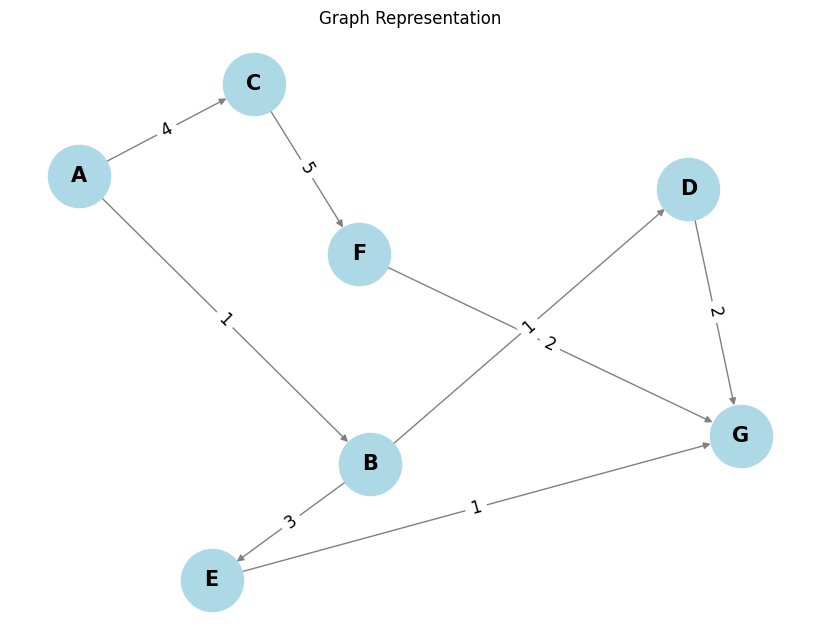

In [71]:
display_graph(graph)

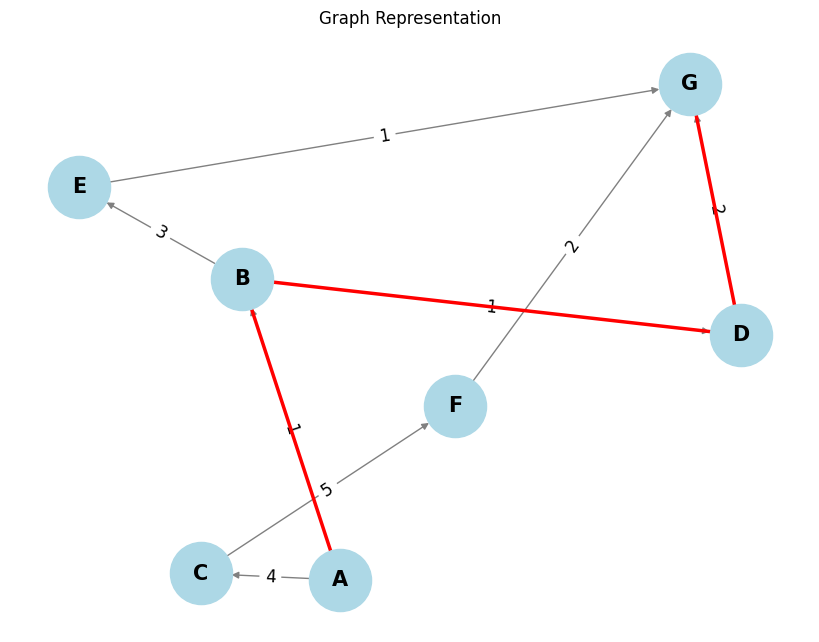

In [73]:
display_graph_with_path(graph, result[1])